<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/merged_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective is to merge all datasets to create a final dataset to train and evaluate our final model. As always, we are going to follow the structure of EDA and Feature Engineering.

**Exploratory Data Analysis**

1.  Load data
2.  Merge all dataset
2.  General statistics
3.  Data Visualization
4.  Data Cleaning
5.  Fixing formats

**Feature Engineering**
7.  Create new features
6.  Data Transformation
7.  Outlier detection
8.  Scaling features (optional)
9.  Create a dataframe grouped by user id

**Import packages**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Exploratory Data Analysis**


## 1. Load Data

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/train.csv')
transactions=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_transactions.csv')
users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_members.csv')
logs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_logs.csv')

## 2. Merge all datasets

In [6]:
df=df.merge(transactions,on='msno',how='left')
df=df.merge(users,on='msno',how='left')
df=df.merge(logs,on='msno',how='left')

# 3. General Statistics

In [7]:
#First rows of the dataset

df.head()

,msno,is_churn,regist_trans,mst_frq_plan_days,mst_frq_pay_met,revenue,is_auto_renew,regist_cancels,qtr_trans,city,bd,gender,registered_via,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,2,7,38,149,0,0,1,18.0,36.0,female,9.0,2005-04-06,0.621227,0.274653,0.447940,0.173287,2.880669,2.962292,8.440285
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,23,30,39,3458,1,2,3,10.0,38.0,male,9.0,2005-04-07,0.444694,0.193904,0.175250,0.179176,2.601858,2.342516,8.087119
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,10,30,39,1492,1,1,1,11.0,27.0,female,9.0,2005-10-16,1.168699,0.469950,0.360776,0.499874,3.253308,3.355790,8.697465
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,2,410,17,1788,0,0,1,13.0,23.0,female,9.0,2005-11-02,1.830671,1.018070,0.974649,0.850550,2.618528,2.699278,8.174752
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,8,30,38,3576,0,0,1,3.0,27.0,male,9.0,2005-12-28,0.757936,0.378817,0.493943,0.969785,4.400313,4.456234,9.985234


In [24]:
#Some statistics

round(df.describe(),2)

,is_churn,regist_trans,mst_frq_plan_days,mst_frq_pay_met,revenue,is_auto_renew,regist_cancels,qtr_trans,city,bd,registered_via,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,992931.00,992931.00,992931.00,992931.00,992931.00,992931.00,992931.00,992931.00,877161.00,877161.00,877161.00,787844.00,787844.00,787844.00,787844.00,787844.00,787844.00,787844.00
mean,0.06,16.00,32.91,39.02,2174.69,0.88,0.28,1.96,5.88,13.45,6.91,1.23,0.55,0.42,0.44,2.61,2.78,8.11
std,0.24,8.25,29.56,3.60,1234.66,0.32,0.58,1.24,6.42,20.23,1.90,0.59,0.31,0.25,0.27,0.76,0.63,0.83
min,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,1.00,-3152.00,3.00,0.00,0.00,0.00,0.00,0.00,0.69,-1.99
25%,0.00,9.00,30.00,38.00,1188.00,1.00,0.00,1.00,1.00,0.00,7.00,0.81,0.33,0.24,0.25,2.17,2.40,7.66
50%,0.00,17.00,30.00,41.00,1920.00,1.00,0.00,1.00,1.00,0.00,7.00,1.17,0.51,0.39,0.40,2.62,2.79,8.14
75%,0.00,23.00,30.00,41.00,3278.00,1.00,0.00,3.00,13.00,27.00,9.00,1.60,0.72,0.56,0.59,3.07,3.17,8.60
max,1.00,71.00,450.00,41.00,8138.00,1.00,20.00,4.00,22.00,2016.00,13.00,4.60,2.77,2.20,2.30,6.06,6.04,11.71


In [8]:
#Basic info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    992931 non-null  object 
 1   is_churn                992931 non-null  int64  
 2   regist_trans            992931 non-null  int64  
 3   mst_frq_plan_days       992931 non-null  int64  
 4   mst_frq_pay_met         992931 non-null  int64  
 5   revenue                 992931 non-null  int64  
 6   is_auto_renew           992931 non-null  int64  
 7   regist_cancels          992931 non-null  int64  
 8   qtr_trans               992931 non-null  int64  
 9   city                    877161 non-null  float64
 10  bd                      877161 non-null  float64
 11  gender                  877161 non-null  object 
 12  registered_via          877161 non-null  float64
 13  registration_init_time  877161 non-null  object 
 14  num_25              

We have to fix some datatypes

In [9]:
#Missing Values

pd.DataFrame({'%MissingValues':round(df.isna().sum()/df.shape[0]*100,2)})

,%MissingValues
msno,0.00
is_churn,0.00
regist_trans,0.00
mst_frq_plan_days,0.00
mst_frq_pay_met,0.00
revenue,0.00
is_auto_renew,0.00
regist_cancels,0.00
qtr_trans,0.00
city,11.66


We have some missing values, but in later stages we can find the way to impute them.

In [10]:
#Checking for duplicated values

print(df.shape)
print(df.msno.nunique())

(992931, 21)
992931


There are no duplicated values in the dataset.

# 4. Data Visualization

Let's explore the data visually and discover useful insights.



In [21]:
def plotting_numerical(data,rows,cols,x_list,size,log=False,hue=None):
  '''Plot numerical data in subplots using Seaborn
    Parameters
    --------------
      data:Data frame with data
      rows:Number of rows in subplot
      cols:Number of columns in subplot
      x_list:List with features names
      size:Tupple with size of plot
      log: Boolean. Decide if histograms are showed with original scale (False) or Log-scale (True). Default False
      hue: Variable name. If want to explore with one categorical feature. Default None
    
  '''
  
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.histplot(data=data,ax=axes[i,j],x=x_list[pos],bins=50,log_scale=log,hue=hue,multiple='stack')
      pos+=1

  return(plt.show())

In [12]:
numerical=['regist_trans','mst_frq_plan_days','revenue','regist_cancels','bd','num_25',
           
           'num_50','num_75','num_985','num_100','num_unq','total_secs']

categorical=['is_churn','mst_frq_pay_met','is_auto_renew','qtr_trans','city',
             'gender','registered_via'
            
]

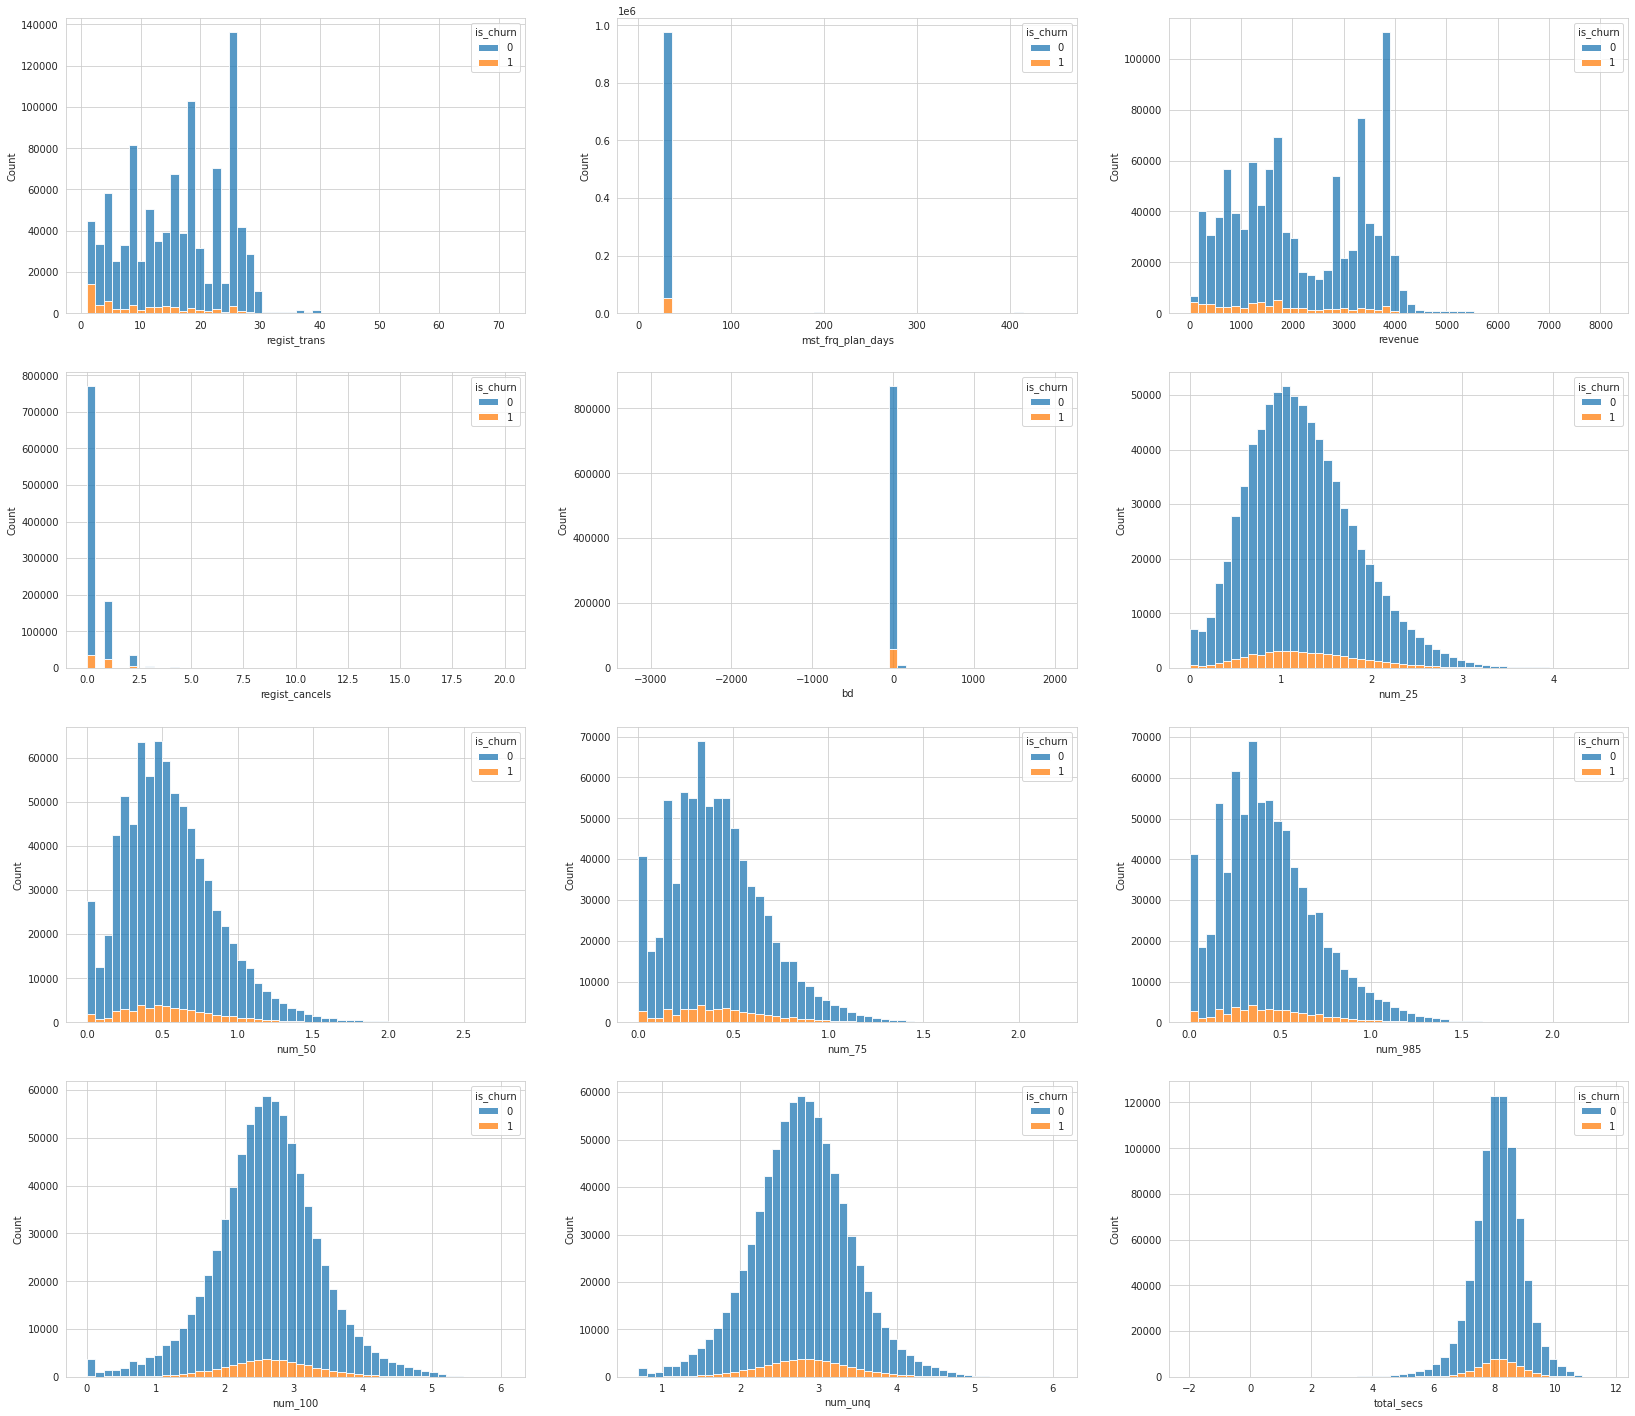

In [23]:
plotting_numerical(df,4,3,numerical,(28,25),hue='is_churn')

From the above we can see that most of the features have a good distribution. We have to explore deeper some outliers in features> ```mst_frq_plan_days, regist_cancels, bd```

In [25]:
def plotting_categorical(data,rows,cols,hue,x_list,size):
  '''Plot categorical data in subplots using Seaborn
  Parameters
  --------------
    data:Data frame with data
    rows:Number of rows in subplot
    cols:Number of columns in subplot
    hue:Feature to distinguish in the plot
    x_list:List with features names
    size:Tupple with size of plot
    
  '''
  
  sns.set_style("whitegrid")
  
  
  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.countplot(ax=axes[i,j],x=x_list[pos],hue=hue,data=data)
      pos+=1

  return(plt.show())

IndexError: ignored

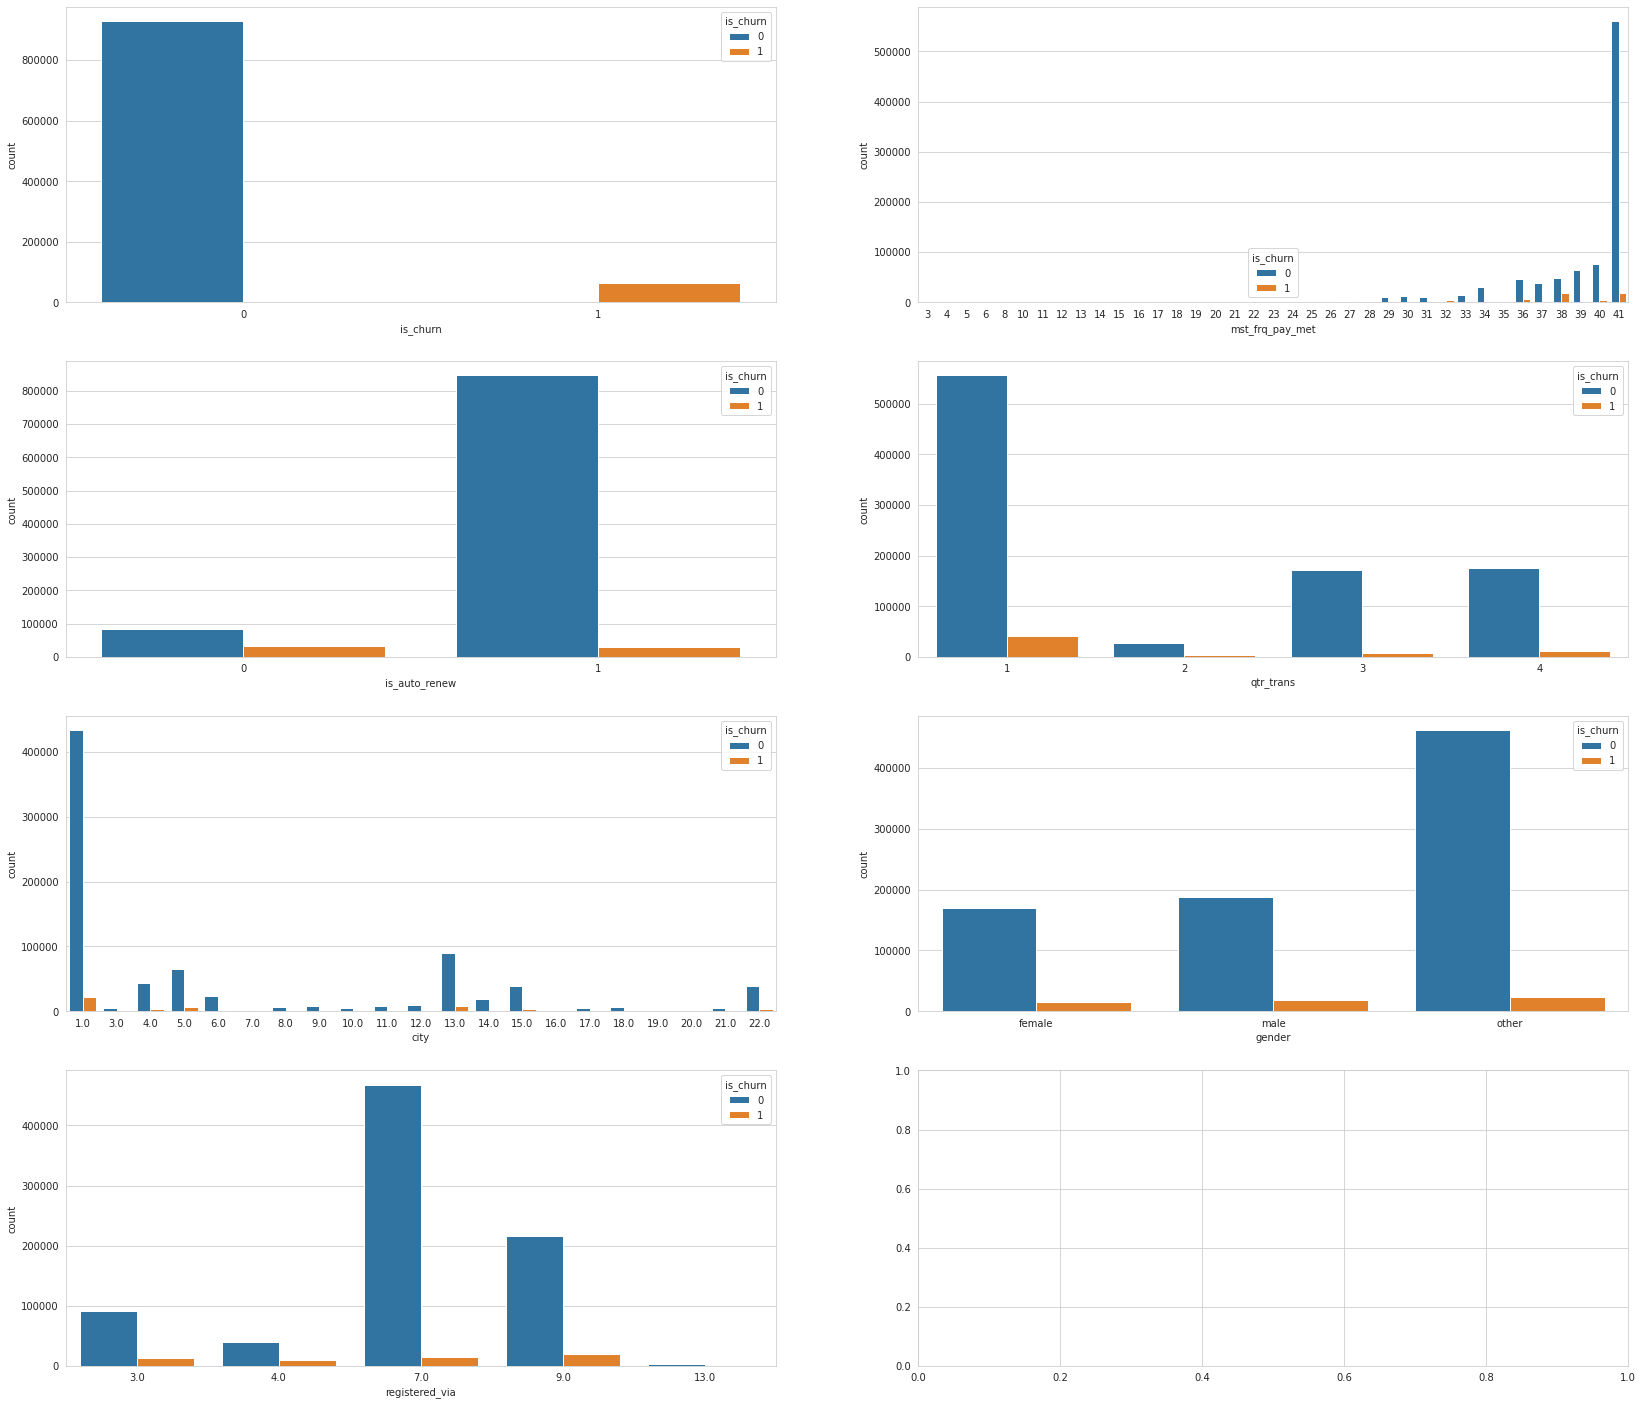

In [28]:
plotting_categorical(df,4,2,hue='is_churn',x_list=categorical,size=(28,25))

*  From the above we can see that the positive class in the targe feature is very small and confirm that data is highly imbalanced.

*  Customers with payment method 38 and 41 and those who are based in city 1 and city 13 are most likely to have churn.

*  Roughly 50% of customers who don't have auto-renew option have churn.

*  Customers with transactions in the first quarter of the year decide to churn.

*  There's not a big difference of churn because of gender.

*  Customers who signed-up via 9 and 7 have more churn.